### Boat Sales


#### Table of Contents
1. Introduction
2. Dataset
3. Required Libraries
4. Load Data
5. Data Wrangling
6. Discovery
7. Structuring
8. Cleaning
9. Exploratory Data Analysis
10. Conclusions

### 1. Intro

You are working as a data analyst for a yacht and boat sales website. The marketing team is
preparing a weekly newsletter for boat owners. The newsletter is designed to help sellers to get
more views of their boat, as well as stay on top of market trends.

They would like me to take a look at the recent data and get some insights. The possible questions that we can ask ourselves is:

- characteristics of the most viewed boat listings in the last 7 days
- is it the most expensive boats that get the most views?
- Are there common features among the most viewed boats?

### 2. Data Set

This data set is all about the popularity of the boats. It has 10 columns. It has details of the boats regarding the year it was built the type of boat, price and much more.

Download site:
https://www.kaggle.com/datasets/karthikbhandary2/boat-sales?resource=download&select=boat_data.csv
    
Data has 10 columns and 9889 rows.

Column names: ['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days']

### 3. Required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt 

### 4. Load Data

In [35]:
# Set path to access data files
path = r'C:\Users\tsoew\OneDrive\Desktop\Boat Sales'

In [36]:
# Import file into dataframe
df = pd.read_csv (os.path.join(path, 'boat_data_orig.csv'), index_col=False)

In [37]:
# Check data head
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


#### Note:
- Location column has some garbled characters which could be a divider between country name and city name.

In [42]:
df['Year Built'].value_counts()

Year Built
2020    1279
2019     663
0        551
2008     457
2007     393
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: count, Length: 122, dtype: int64

In [43]:
df.shape

(9888, 10)

In [44]:
df = df[df['Year Built'] != 0]

In [45]:
df.shape

(9337, 10)

In [38]:
# Check data statistic
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


#### Note:
- Year Built minimum has 0 values which are not supposed to be there.
- Length minimum is 1.04 which is not common for a boat length.
- Width minimum is 0.01 which is not right.
- Num of Views has maximum of 3263 which can be an outlier compared to other values.


In [6]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


#### Note:
- Some columns have Null values that need to be cleaned up.
- Price column is Object Datatype, which needs to be converted to Number for regression analysis.

### 5. Data Wrangling

#### 5.a Separate Price from currency symbol

In [7]:
#Split Price to 2 columns: 'currency' & 'Price'
df[['currency','Price']]= df['Price'].str.split(' ', expand=True)

In [8]:
# Convert all prices into US Dollar currency

def USDprice(Price,currency):
    
    if currency=='EUR':              
        #Euro
        return int(Price) * 1.075
    elif currency=='CHF':            
        #Swiss Franc
        return int(Price) * 1.099
    elif currency=='DKK':            
        #Danish Krone
        return int(Price) * 0.143
    elif currency=='Â£':             
        #British Pounds
        return int(Price) * 1.25
    
df['Price_USD'] = df.apply(lambda x: USDprice(x.Price, x.currency), axis=1)

In [9]:
# delete Price and currency columns as we are not using them anymore
df.drop('currency', axis=1, inplace=True)
df.drop('Price', axis=1, inplace=True)

#### 5.b Separate Country and City names

In [10]:
#Split Location to 3 columns: 'Country','City','Other'

df[['Country','City', 'Other']]= df['Location'].str.split('Â»', expand=True)

In [11]:
# remove some garbage characters

df['City']=df['City'].str.replace('¶','',regex=True)
df['City']=df['City'].str.replace('Ã','',regex=True)

In [12]:
df.shape

(9888, 13)

#### 5.c Separate Type Column to get the word "New"

In [13]:
df[['t1', 't2']] = df['Type'].str.split(',', expand=True)

In [14]:
df[['t3', 't4', 't5', 't6']] = df['t1'].str.split(' ', expand=True)

In [15]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Price_USD,Country,City,Other,t1,t2,t3,t4,t5,t6
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3667.363,Switzerland,Lake Geneva,VÃ©senaz,new boat from stock,None,new,boat,from,stock
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3751.750,Germany,Bnningstedt,None,new boat from stock,None,new,boat,from,stock
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,4143.230,Switzerland,Lake of Zurich,StÃ¤fa ZH,new boat from stock,None,new,boat,from,stock
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,3703.700,Denmark,Svendborg,None,new boat from stock,None,new,boat,from,stock
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3653.925,Germany,Bayern,MÃ¼nchen,new boat from stock,None,new,boat,from,stock


In [16]:
df.shape

(9888, 19)

### 6. Data Cleaning

#### 6.a Fix column names

In [17]:
#rename columns
df.rename(columns={"Number of views last 7 days": "Views"}, inplace=True)

#### 6.b Replace 0s in 'Year Built' with NaN

In [18]:
# Replace the value 0 in Year Built with NaN
df['Year Built'].replace(0, np.nan, inplace=True)

# remove NaN values in "Year Build"
df.dropna(subset=['Year Built'], inplace=True)


#### 6.c Transform 'Year Build' into 'Age' for regression purpose


In [19]:
df['Year Built'] = df['Year Built'].astype(int)
df['Age'] = pd.Timestamp('now').year - df['Year Built'] 

#### 6.d Remove extra space in Country column

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9337 entries, 0 to 9887
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Boat Type     9337 non-null   object 
 1   Manufacturer  8051 non-null   object 
 2   Type          9332 non-null   object 
 3   Year Built    9337 non-null   int32  
 4   Length        9328 non-null   float64
 5   Width         9282 non-null   float64
 6   Material      7675 non-null   object 
 7   Location      9301 non-null   object 
 8   Views         9337 non-null   int64  
 9   Price_USD     9337 non-null   float64
 10  Country       9301 non-null   object 
 11  City          8449 non-null   object 
 12  Other         2984 non-null   object 
 13  t1            9332 non-null   object 
 14  t2            7206 non-null   object 
 15  t3            9332 non-null   object 
 16  t4            9252 non-null   object 
 17  t5            1898 non-null   object 
 18  t6            1898 non-null   obj

In [21]:
# df['Country'] = df['Country'].apply(lambda x: x.strip())

#### 6.e Remove unnecessary columns

In [22]:
df.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Location', 'Views', 'Price_USD', 'Country', 'City',
       'Other', 't1', 't2', 't3', 't4', 't5', 't6', 'Age'],
      dtype='object')

In [23]:
df.drop(['Manufacturer', 'Year Built', 'Material', 'Location', 'Other'], 
         axis=1, inplace=True)
df.drop(['Type', 't1', 't2', 't4', 't5', 't6'], axis=1, inplace=True)

In [24]:
# remove all Null values
df.dropna(inplace=True)

In [25]:
df.shape

(8399, 9)

### 7. Subsetting
Select only New boats into a new Dataframe for regression purpose

In [26]:
df.shape

(8399, 9)

In [27]:
#df_breakfast = df_product[df_product['department_id']==14]

df_new = df[df['t3'] == 'new']

In [28]:
df_new.shape

(1792, 9)

In [29]:
df_new.head()

,Boat Type,Length,Width,Views,Price_USD,Country,City,t3,Age
0,Motor Yacht,4.00,1.90,226,3667.363,Switzerland,Lake Geneva,new,7
1,Center console boat,4.00,1.50,75,3751.750,Germany,Bnningstedt,new,4
3,Sport Boat,3.00,1.00,64,3703.700,Denmark,Svendborg,new,4
4,Fishing Boat,3.55,1.46,58,3653.925,Germany,Bayern,new,5
8,Fishing Boat,3.64,1.37,45,3582.975,Germany,Bayern,new,5


C:\Users\tsoew\AppData\Local\Temp\ipykernel_14644\2435866192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new.Age)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

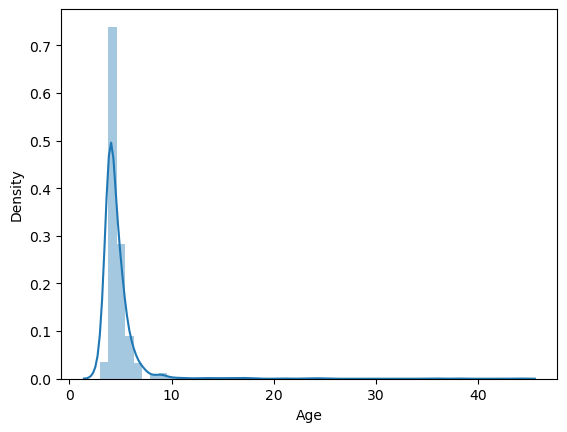

In [30]:
sns.distplot(df_new.Age)

C:\Users\tsoew\AppData\Local\Temp\ipykernel_14644\4291416811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new.Length)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Length Distribution')

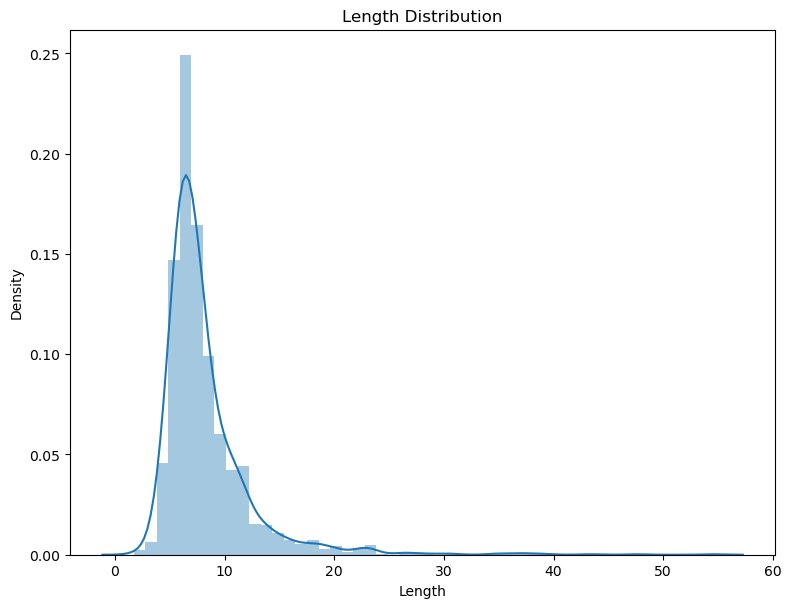

In [31]:
fig = plt.figure(figsize=(20,15) )
ax1 = fig.add_subplot(223)
sns.distplot(df_new.Length)
ax1.set_title("Length Distribution")

C:\Users\tsoew\AppData\Local\Temp\ipykernel_14644\445326884.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new.Width)
C:\Users\tsoew\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Witdh Distribution')

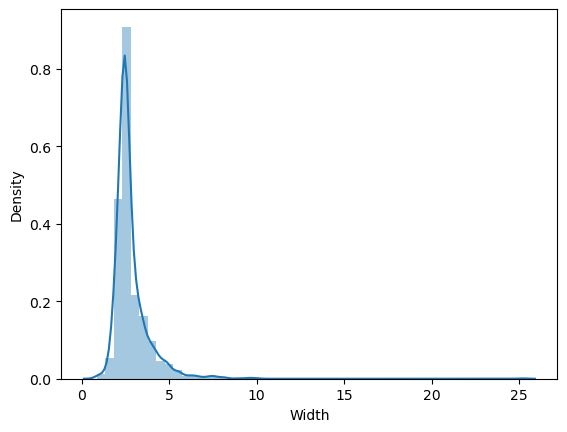

In [32]:
ax2 = fig.add_subplot(223)
sns.distplot(df_new.Width)
ax2.set_title("Witdh Distribution")

In [33]:
# sns.pairplot(df_new)

In [34]:
# Export the new format of department dataframe
df_new.to_csv(os.path.join(path, 'boat_data_new.csv'))